In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

# Load data
df = pd.read_csv("archive/Stocks/aapl.us.txt")
format_dates = df['Date']
format_dates = format_dates.iloc[7100:]
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda x: x.timestamp())

""" low = {'mae': 0, 'i': 0}
for i in range(100, len(df), 250):
    print(i)
    # split the data into training and testing sets
    train = df.iloc[:i]
    test = df.iloc[i:]
    test = test.reset_index(drop=True)

    # Initialize Prophet model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit model to training data
    model.fit(train.drop('Close', axis=1), train['Close'])

    # make predictions on the test data
    predictions = model.predict(test.drop('Close', axis=1))
    mae = mean_absolute_error(test['Close'], predictions)
    print(mae)
    if i == 100:
        low['mae'] = mae
        low['i'] = i
    
    if mae < low['mae']:
        low['mae'] = mae
        low['i'] = i
        print(f'new low {mae}')

print(low) """


# Create a feature matrix X by selecting relevant columns from the dataframe
X = df[['Date','Open', 'High', 'Low', 'Volume']]
# Create a target vector y by selecting the column to predict from the dataframe
y = df['Close']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X.iloc[:7894]
X_test = X.iloc[7894:8146]
print(X_train)
print(X_test)
y_train = y.iloc[:7894]
y_test = y.iloc[7894:8146]

# Initialize a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

              Date       Open       High        Low    Volume
0     4.633632e+08    0.42388    0.42902    0.41874  23220030
1     4.636224e+08    0.42388    0.42516    0.41366  18022532
2     4.637088e+08    0.42516    0.43668    0.42516  42498199
3     4.637952e+08    0.42902    0.43157    0.41618  37125801
4     4.638816e+08    0.43927    0.44052    0.43927  57822062
...            ...        ...        ...        ...       ...
7889  1.450915e+09  104.93000  104.93000  103.93000  14122706
7890  1.451261e+09  103.59000  103.69000  102.22000  27737339
7891  1.451347e+09  102.97000  105.35000  102.87000  32127908
7892  1.451434e+09  104.53000  104.64000  103.18000  23107102
7893  1.451520e+09  103.02000  103.04000  100.91000  40331735

[7894 rows x 5 columns]
              Date     Open     High      Low    Volume
7894  1.451866e+09   98.786  101.460   98.211  65260163
7895  1.451952e+09  101.810  101.910   98.597  54763789
7896  1.452038e+09   96.816   98.558   96.149  69848688
7897  1

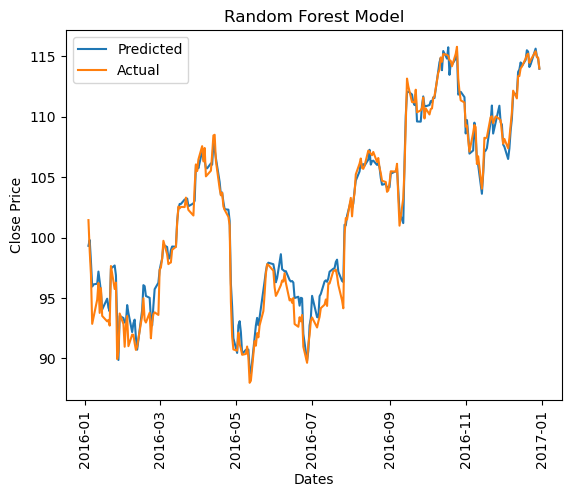

MAE: 0.7538392063491922
MSE: 1.0047163087221822
RMSE: 1.002355380452553


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

predictions = pd.DataFrame(columns=['y_pred', 'y_true', 'date'])
predictions['date'] = X_test['Date']
predictions['y_true'] = y_test
predictions['y_pred'] = y_pred

# print(X_test)
# print(y_test)
# print(y_pred)

import datetime

# Convert the timestamp to a datetime object
predictions['date'] = predictions['date'].apply(lambda x: datetime.datetime.fromtimestamp(x))

# Extract the year from the datetime object
predictions['year'] = predictions['date'].apply(lambda x: x.year)

# Group the predictions by year and compute the mean value for each year
# grouped_predictions = predictions.groupby('year').mean()

# # Plot the predicted and actual values
# plt.plot(grouped_predictions.index, grouped_predictions['y_pred'], label='Predicted')
# plt.plot(grouped_predictions.index, grouped_predictions['y_true'], label='Actual')
# plt.xlabel('Year')
# plt.legend()
# plt.show()


# Plot the predicted and actual values
plt.plot(predictions['date'], predictions['y_pred'], label='Predicted')
plt.plot(predictions['date'], predictions['y_true'], label='Actual')
plt.title("Random Forest Model")
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 90)
plt.legend()
plt.show()

# evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse) 

In [ ]:
# Calculate the Moving Average for Open price over the last 5 days
df['MA_Open_5'] = df['Open'].rolling(5).mean()

# Calculate the Moving Average for Close price over the last 5 days
df['MA_Close_5'] = df['Close'].rolling(5).mean()

# Calculate the Moving Average for Volume over the last 5 days
df['MA_Volume_5'] = df['Volume'].rolling(5).mean()

# Calculate the Relative Strength Index over the last 14 days
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Calculate the Commodity Channel Index over the last 20 days
tp = (df['High'] + df['Low'] + df['Close']) / 3
ma = tp.rolling(20).mean()
dev = (tp - ma).abs().rolling(20).mean()
cci = (tp - ma) / (0.015 * dev)
df['CCI_20'] = cci

# Calculate the Exponential Moving Average for Close price over the last 10 days
df['EMA_Close_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Calculate the Bollinger Bands over the last 20 days
sma = df['Close'].rolling(20).mean()
std = df['Close'].rolling(20).std()
df['BB_upper_20'] = sma + 2 * std
df['BB_lower_20'] = sma - 2 * std

# Fill null values with mean for all columns except 'Date', since nulls will happen for the first
# Few rows where rolling average cannot be computed
df[df.columns.difference(['Date'])] = df[df.columns.difference(['Date'])].apply(lambda x: x.fillna(x.mean()))
print(df.describe())

In [ ]:
# Split the data into training and test sets based on a cutoff date
rf_data = df.copy()
rf_data['Date'] = pd.to_datetime(rf_data['Date'])

cutoff_date = pd.to_datetime('2001-01-01')
train = rf_data[rf_data['Date'] < cutoff_date]
test = rf_data[rf_data['Date'] >= cutoff_date]

# Split the training and test sets into features and target
X_train = train.drop(['Date', 'Close'], axis=1)
y_train = train['Close']
X_test = test.drop(['Date', 'Close'], axis=1)
y_test = test['Close']

from sklearn.preprocessing import MinMaxScaler
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)